# Business Case 0 (example)

In [52]:
# Importing necessary libraries

import os
from pathlib import Path
from math import ceil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_score
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve
import graphviz

In [53]:
# Defining PROJECT_ROOT
PROJECT_ROOT = Path(os.path.abspath('')).resolve().parents[0]

# The CRISP-DM process: 
<img src="../description/images/crispdm.png" alt="CRISP-DM" width="400"/>

## Business Understanding:
<img src="../description/images/business_understanding.png" alt="Business Understanding" width="400"/>

> This initial phase focuses on understanding the project objectives and requirements from a business perspective, then converting this knowledge into a data mining problem definition and a preliminary plan designed to achieve the objectives.

This course will focus on determining the business objectives and the data mining goals. Minimally, the business cases' reports must consider these two steps.

### <u>Determine Business Objectives</u>
A Portuguese banking institution made several marketing campaigns to sell its customers a **term deposit**. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to assess if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The bank wants to **understand better its customers** so that it can create products suitable for the different type of customers and **improve its marketing campaigns conversion**.

### Assess Situation
For this project you have the *bank-additional-full.csv* dataset with all the marketing campaign contacts (41188) and 20 features, ordered by date. This data is referent to 17 marketing campaigns completed between May 2008 and November 2010. The customers selected for the campaigns were chosen randomly within the defined constraints: individual customers with at least 18 years old.

### <u>Determine Data Mining Goals</u>
> A business goal states objectives in business terminology. A data mining goal states project objectives in technical terms. For example, the business goal might be “Increase catalog sales to existing customers.” A data mining goal might be “Predict how many widgets a customer will buy, given their purchases over the past three years, demographic information (age, salary, city, etc.), and the price of the item.”

### Produce Project Plan
> Describe the intended plan for achieving the data mining goals and thereby achieving the business goals.
The plan should specify the steps to be performed during the rest of the project, including the initial
selection of tools and techniques. The project plan contains detailed plans for each phase. The project plan is a dynamic document in the sense that at the end of each phase, a review of progress and achievements is necessary and a corresponding update of the project plan is recommended.

## Data Understanding:
<img src="../description/images/data_understanding.png" alt="Data Understanding" width="400"/>

> The data understanding phase starts with initial data collection and proceeds with activities that enable you to become familiar with the data, identify data quality problems, discover first insights into the data, and/or detect interesting subsets to form hypotheses regarding hidden information.

### Dataset description
#### Customer features (internal database):
- **age**: numeric - age of the customer
- **job**: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- **marital**: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- **education**: (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- **default**: has credit in default? (categorical: 'no','yes','unknown')
- **housing**: has housing loan? (categorical: 'no','yes','unknown')
- **loan**: has personal loan? (categorical: 'no','yes','unknown')

#### Current campaign features:
- **contact**: contact communication type (categorical: 'cellular','telephone') 
- **month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- **day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- **duration**: last contact duration, in seconds (numeric). **Important note**: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Other campaigns features:
- **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- **previous**: number of contacts performed before this campaign and for this client (numeric)
- **poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success'). 'nonexistent' can be cancellation, not answering, etc.

#### Generic social and economic context features (external features):
- **emp.var.rate**: employment variation rate - quarterly indicator (numeric)
- **cons.price.idx**: consumer price index - monthly indicator (numeric) 
- **cons.conf.idx**: consumer confidence index - monthly indicator (numeric) 
- **euribor3m**: euribor 3 month rate - daily indicator (numeric)
- **nr.employed**: number of employees - quarterly indicator (numeric)

#### Subscription info:
- **y**: has the client subscribed a term deposit? (binary: 'yes','no')

More information on the dataset available at https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### Collect initial data
Loading the data is straight forward in this case:

In [54]:
# Load data 
df = pd.read_csv(os.path.join(PROJECT_ROOT, 'data', 'bank-additional-full.csv'), sep=";")

### Describe, explore and assess data quality

In [55]:
# Display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [56]:
# Display top 15 rows
df.head(15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [57]:
# Summary statistics for all variables
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# Check missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [59]:
# Check duplicated observations
df.loc[df.duplicated(keep=False), :]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


- As already mentioned and confirmed below, the dataset has 41188 rows and 21 columns.
- The datatypes look correct even though we need to encode some categorical features to numerical values (e.g. month, day_of_week, etc.).
- There are no missing values.
- There are some features with unknown values (e.g. default).
- There are some high cardinality features (e.g. job, education).
- There are customers under 18. There are some features with 999 code (e.g. pdays).
- There are 12 duplicated observations in the dataset (all are customers that haven't been contacted before) which are likely to be removed.

Let's explore further:

In [60]:
# Define metric and non-metric features
non_metric_features = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome', 'y']
metric_features = df.columns.drop(non_metric_features).to_list()

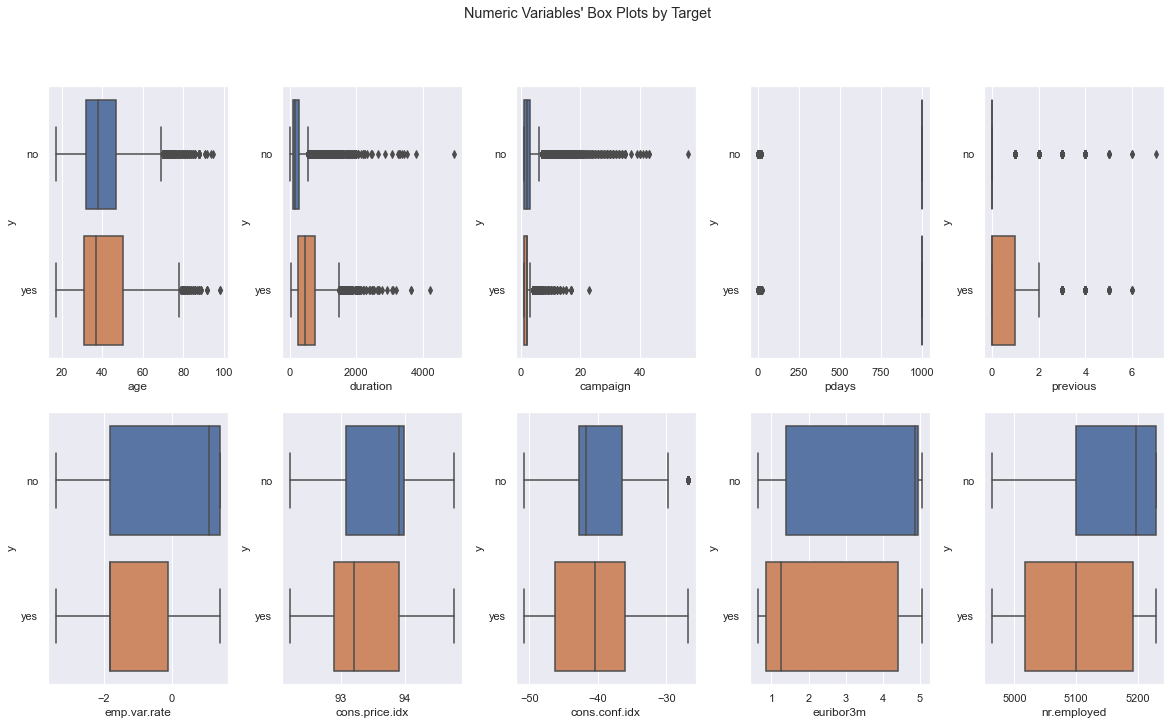

In [61]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=df[feat], y=df['y'], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots by Target"
plt.suptitle(title)
plt.subplots_adjust(wspace=0.3)

plt.show()

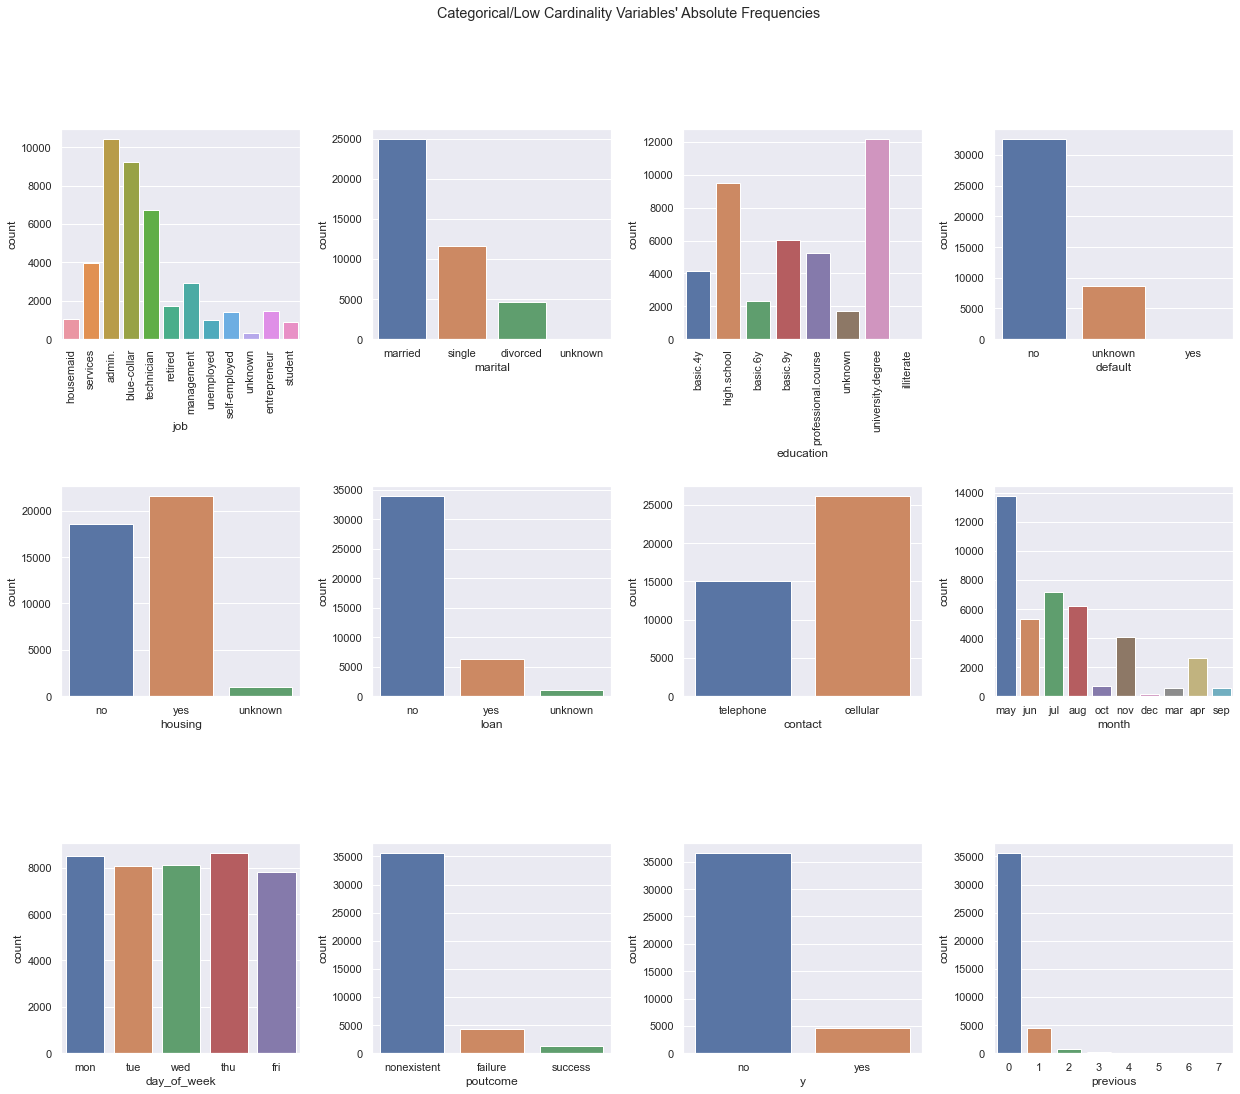

In [62]:
# All Non-Metric/ Low Cardinality Variables' Absolute Frequencies
sns.set()

features = non_metric_features + ['previous']
# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(3, ceil(len(features) / 3), figsize=(21, 17))

# Plot data
# Iterate across axes objects and associate each bar plot:
for ax, feat in zip(axes.flatten(), features):
    sns.countplot(x=df[feat], ax=ax)

title = "Categorical/Low Cardinality Variables' Absolute Frequencies"
plt.suptitle(title)
# Rotating X-axis labels
axes.flatten()[0].tick_params(axis='x', labelrotation = 90)
axes.flatten()[2].tick_params(axis='x', labelrotation = 90)
plt.subplots_adjust(wspace=0.3, hspace=0.7)

plt.show()

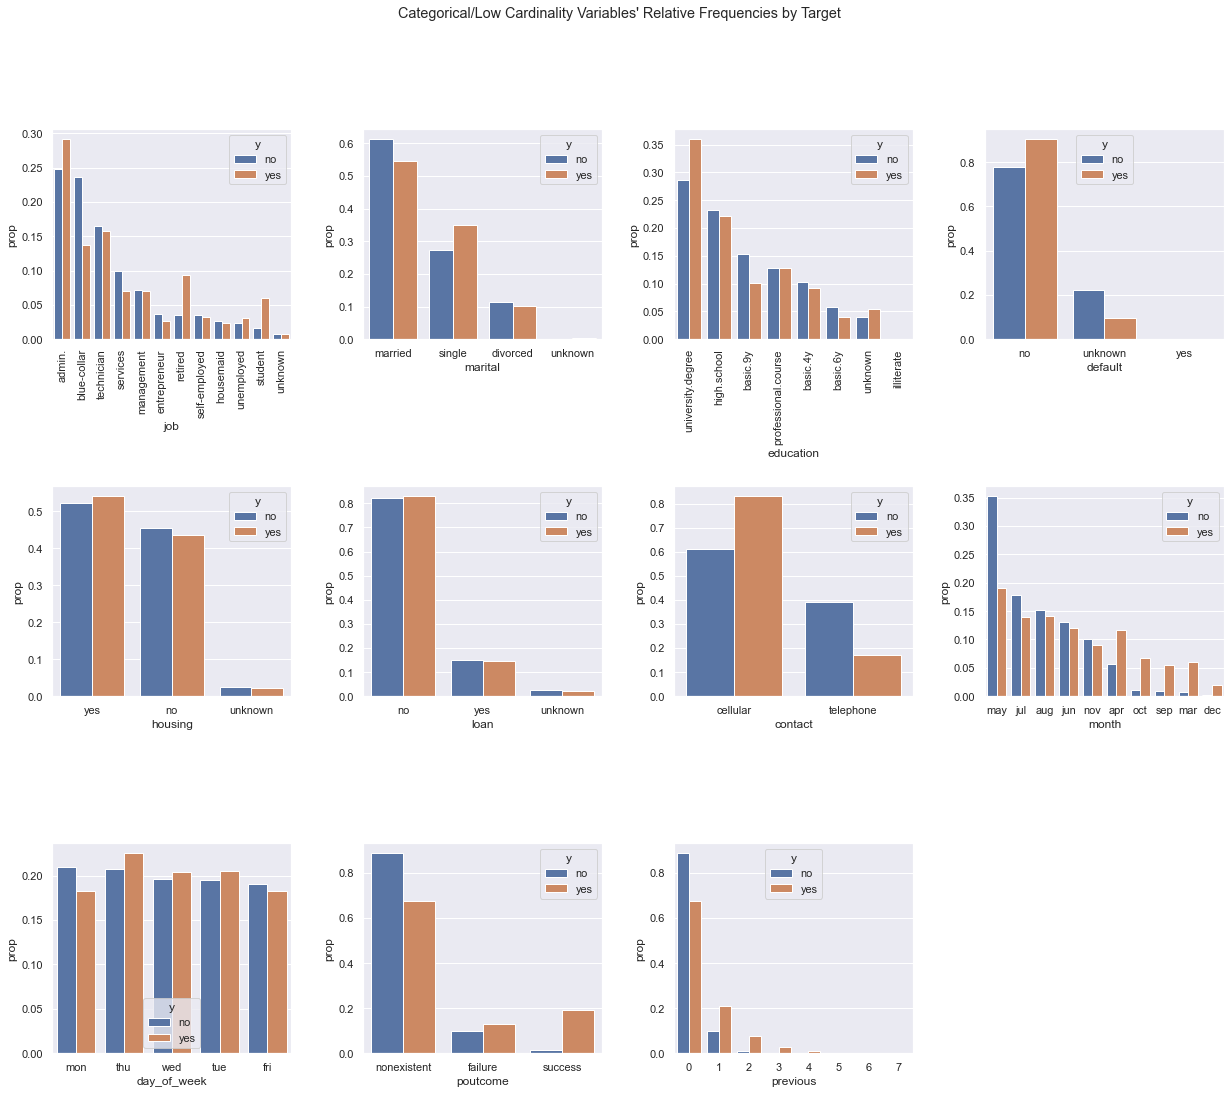

In [63]:
# All Non-Metric/ Low Cardinality Variables' Relative Frequencies by Target
sns.set()

features = non_metric_features + ['previous']
features.remove('y')
# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(3, ceil(len(features) / 3), figsize=(21, 17))

# Plot data
# Iterate across axes objects and associate each bar plot:
for ax, feat in zip(axes.flatten(), features):
    data = df.groupby(['y'])[feat].value_counts(normalize=True).rename('prop').reset_index()
    sns.barplot(data=data, x=feat, y='prop', hue='y', ax=ax)

title = "Categorical/Low Cardinality Variables' Relative Frequencies by Target"
plt.suptitle(title)
# Rotating X-axis labels
axes.flatten()[0].tick_params(axis='x', labelrotation = 90)
axes.flatten()[2].tick_params(axis='x', labelrotation = 90)
axes.flatten()[-1].remove()
plt.subplots_adjust(wspace=0.3, hspace=0.7)

plt.show()

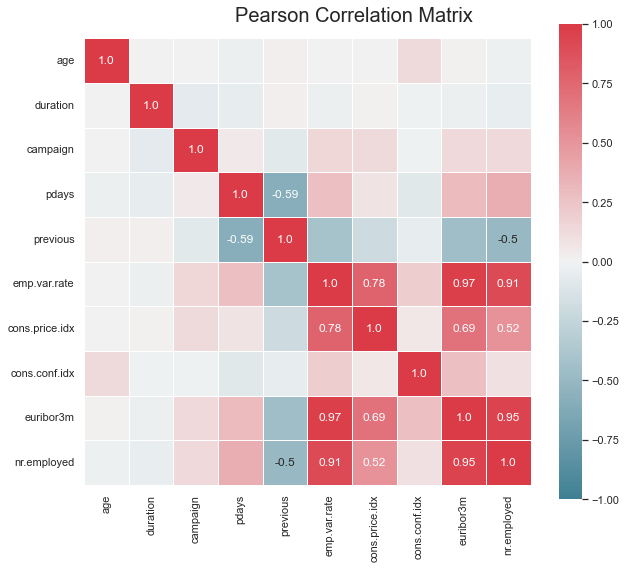

In [64]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df[metric_features].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Pearson Correlation Matrix", fontsize=20)

plt.show()

In [65]:
# Number of observations with y='no' and poutcome='success'
((df['y']=='no') & (df['poutcome']=='success')).sum()

479

In [66]:
# Percentage of y='yes'
(df['y']=='yes').value_counts(normalize=True)

False    0.887346
True     0.112654
Name: y, dtype: float64

#### Observations:
- 11% of the contacts resulted in the subscription of a term deposit
- Seems that *default* unknown has discriminative power in the target
- *default* = yes corresponds to 3 observations
- Why does *poutcome* = success isn't always *y* = 1?
- Redundant variables: *nr.employment*, *euribor3m*, *emp.var.rate*
- Irrelevant variables: *day_of_week*, *housing*, *loan* show low discriminancy on the target
- *duration* and *campaign* might have some outliers

## Data Preparation:
<img src="../description/images/data_preparation.png" alt="Data Preparation" width="400"/>

> The data preparation phase covers all activities needed to construct the final dataset \[data that will be fed into the modeling tool(s)\] from the initial raw data. Data preparation tasks are likely to be performed multiple times and not in any prescribed order.

Tasks include:
- table, record, and attribute selection;
- transformation and cleaning of data for modeling tools, such as encoding and treating missing values, outliers and nonsensical values.

### Select data

In [67]:
# Preserving the original df
df_clean = df.copy()

# Droping duplicated rows
df_clean.drop_duplicates(inplace=True)

# Droping customers with age under 18
df_clean = df_clean.loc[(df_clean['age'] >= 18), :]

# Droping irelevant columns
df_clean.drop(['housing', 'loan'], axis=1, inplace=True)

# Droping current campaign columns
df_clean.drop(['day_of_week', 'month', 'contact', 'duration'], axis=1, inplace=True)

# Droping ungovernable columns
df_clean.drop(['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
              axis=1, inplace=True)

df_clean.head()

,age,job,marital,education,default,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,1,999,0,nonexistent,no
2,37,services,married,high.school,no,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,1,999,0,nonexistent,no
4,56,services,married,high.school,no,1,999,0,nonexistent,no


- 12 duplicated observations **were removed**. For future marketing campaigns, the contacts should be matched with a customer id to easily detect this kind of situations.
- 5 observations **were removed** because these were customers under 18 years old, which means they don't belong to our target population.
- Current campaign features: This set of features is useless for a predictive purpose as we only know their value after the contact, which also gives us the answer to whether the customer subscribed or not to the term deposit. These variables **were excluded** from the model.
- Generic social and economic context features: These variables explain the context at the time of data extraction and not particular characteristics of each customer (or proxys of those characteristics). Therefore, these variables **were excluded** from the model.

### Clean data
#### Dealing with outliers

In [68]:
# Univariate outliers
df_clean['campaign'].sort_values(ascending=False)

4107     56
18728    43
13447    43
4168     42
5304     42
         ..
27109     1
27108     1
27107     1
27106     1
0         1
Name: campaign, Length: 41171, dtype: int64

In [69]:
# Removing outliers from the dataset
df_clean = df_clean.loc[df_clean['campaign']!=56, :]

After looking at the distributions of the metric features in the Data Exploration stage, we noticed campaign registered values above 50 that were quite far from the rest of the distribution. Upon closer inspection, we realised this is an isolated observation with campaign=56. This observation was removed in order to not affect the analysis results ahead.

#### Dealing with 'unknown' values

In [70]:
# Features with unknown values and their corresponding amount
(df_clean == 'unknown').sum().sort_values(ascending=False)

default      8595
education    1728
job           330
marital        80
age             0
campaign        0
pdays           0
previous        0
poutcome        0
y               0
dtype: int64

The 'unknown' values only occurr in features collected from the internal database which might indicate this value doesn't occurr randomly and might have a specific reason behind it related with the data collection process. This is further supported by the way this value discriminates between target values for some variables such as *default*. We decided to keep this value as is and then apply some sort of feature selection process to let the model use the 'unknown' value for predictive purposes.

#### Dealing with 999 code in pdays

In [71]:
# Check the number of observations with pdays != 999
(df_clean['pdays'] != 999).value_counts(normalize=True)

False    0.963274
True     0.036726
Name: pdays, dtype: float64

In [72]:
# Binarize pdays variable
df_clean.loc[df_clean['pdays'] != 999, 'pdays'] = 1
df_clean.loc[df_clean['pdays'] == 999, 'pdays'] = 0
df_clean.rename({'pdays': 'pdays_bin'}, axis=1, inplace=True)

The variable *pdays* showed that customers that haven't been contacted by a marketing campaign before are more likely to not subscribe to the term deposit. After noticing that only 4% of the observations were previously contacted we decided to convert this variable to binary. Therefore the new variable *pdays_bin* registers whether a customer has (1) or not (0) been contacted by a previous marketing campaign.
#### Encoding categorical features

In [74]:
# One hot encode categorical features
ohc_features = ['job', 'marital', 'education', 'default', 'poutcome']
ohc = OneHotEncoder(sparse=False)
df_ohc = pd.DataFrame(ohc.fit_transform(df_clean[ohc_features]),
                      index=df_clean.index,
                      columns=ohc.get_feature_names(ohc_features))

In [77]:
# Label encode target variable
df_clean['y'] = LabelEncoder().fit_transform(df_clean['y'])

In [78]:
# Concatenating ohc categorical features with rest of the dataset
df_clean = pd.concat([df_clean.loc[:, df_clean.columns.drop(ohc_features)], df_ohc], axis=1)

One-hot encoding was applied to encode the categorical features such that the model can utilize them for predictive purposes. Also we encoded the target with 1s and 0s instead of 'no's and 'yes's.
### Construct data

In [80]:
# Create log(campaign)
df_clean['campaign'] = np.log(df_clean['campaign'])
df_clean.rename({'campaign': 'campaign_log'}, axis=1, inplace=True)
df_clean.head()

,age,campaign_log,pdays_bin,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,0.0,0,0,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,57,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,40,0.0,0,0,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,56,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


A log transformation was applied to *campaign* in order to reduce the tail size and make the distribution less skewed.

Before we move on let's look at our data once again:

In [81]:
# Define metric and non-metric features
metric_features = ['age', 'campaign_log', 'previous']
non_metric_features = df_clean.columns.drop(metric_features).to_list()

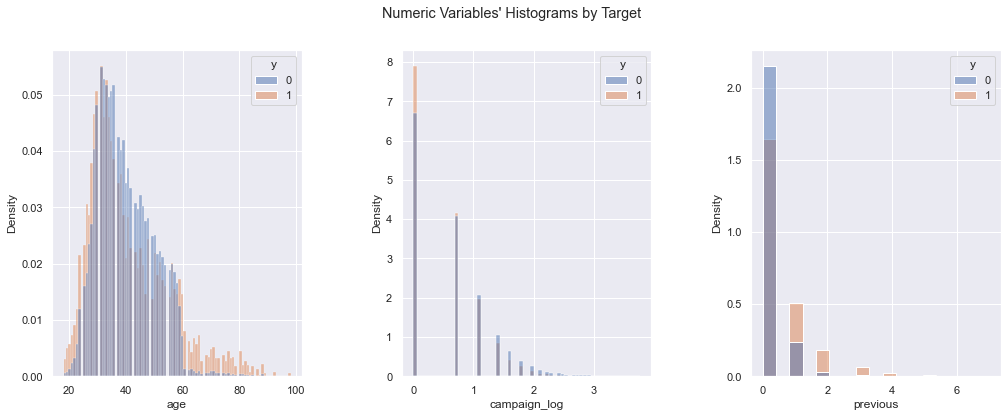

In [82]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(1, len(metric_features), figsize=(17, 6))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features):
    sns.histplot(x=df_clean[feat], hue=df_clean['y'], stat='density', common_norm=False, ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms by Target"
plt.suptitle(title)
plt.subplots_adjust(wspace=0.4)

plt.show()

## Modeling:
<img src="../description/images/modeling.png" alt="Modeling" width="400"/>

> In this phase, various modeling techniques are selected and applied, and their parameters are calibrated to optimal values. Typically, there are several techniques for the same data mining problem type. Some techniques have specific requirements on the form of data. Therefore, going back to the data preparation phase is often necessary.

### Select modeling technique
For this specific task we opted to use a Decision Tree model as:
- It deals well with different types of variables, including categorical ones
- It gives us some understanding on how a given observation is classified
- It automatically finds the most relevant attributes for predicting the target
- Provides general rules that can be applied for future marketing campaigns to only contact the customers that are most likely to subscribe to the term deposit

Note that the Decision Tree model is nonparametric and scale invariant, meaning no assumptions are made about the multivariate distribution of the data and features with different scales don't impose an issue for the model.

### Generate test design
The data will be split into train and test set with a corresponding size of 80 and 20 percent of the entire dataset. This split will be based on random stratified (preserving target relative frequencies) sampling. We will use a 5-fold cross-validation approach to evaluate each model 5 consecutive times and perform hyper-parameter tuning. Afterwards, we train the model on the entire train set with the best hyper-parameter configuration and use the test set to obtain a clean and unbiased estimate of the generalization capability of the model.

The model selection procedure will be based on a single measure: *precision* (proportion of correctly positive events from all events identified as positive). This measure was selected as one of the business goals is to increase the conversion rate of the marketing campaign. Therefore, the model that maximizes the *precision* will be selected.

In [84]:
# Split data into train, validation and test
X_train, X_test, y_train, y_test = train_test_split(
    df_clean.drop('y', axis=1),
    df_clean['y'],
    stratify=df_clean['y'],
    test_size=0.2,
    random_state=0)

### Build and assess model

In [85]:
# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=0)

# Define the grid to explore
grid = {
    "criterion": ["entropy", "gini"],
    "splitter": ["random", "best"],
    "max_depth": [3, 6, 9],
    "min_samples_split": [0.005, 0.01, 0.05],
    "max_features": [None, "sqrt"],
    "class_weight": [None, 'balanced', {0: 1, 1: 2}]
    }

In [95]:
# Instatiating GridSearch
splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
gscv = GridSearchCV(dt, grid, cv=splitter, scoring='precision', refit=True, verbose=-1, n_jobs=4)

# Get ID of grid search
# id_num = input("Insert GridSearch ID number: ")
id_num = 1

In [ ]:
# Grid Search and model training
gscv.fit(X_train, y_train)

In [99]:
# Saving cv_results for specific Grid Search run
out_path = os.path.join(PROJECT_ROOT, 'analysis')
score_summary = pd.DataFrame(gscv.cv_results_).sort_values(by="mean_test_score", ascending=False)
score_summary.to_csv(os.path.join(out_path, 'grid_search_results{}.csv'.format(id_num)))

# Saving best model
best_dt = gscv.best_estimator_
dump(best_dt, os.path.join(out_path, 'best_decision_tree{}.joblib'.format(id_num)))

# Get test set y_pred and evaluate on precision
y_test_pred = best_dt.predict(X_test)

print("The best model has a mean cross-validated precision of {0:.3f} and a test set precision of {1:.3f}".\
      format(gscv.best_score_, precision_score(y_test, y_test_pred)))
print("\nThe hyper-parameters selected are:\n", gscv.best_params_)

The best model has a mean cross-validated precision of 0.663 and a test set precision of 0.690

The hyper-parameters selected are:
 {'class_weight': None, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_split': 0.01, 'splitter': 'best'}


In [101]:
# Test set classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7307
           1       0.69      0.19      0.30       927

    accuracy                           0.90      8234
   macro avg       0.80      0.59      0.62      8234
weighted avg       0.88      0.90      0.87      8234



In [102]:
# Test set confusion matrix
pd.DataFrame(data=confusion_matrix(y_test, y_test_pred), 
             index=pd.Index(y_train.unique(), name="True"), 
             columns=pd.Index(y_train.unique(), name="Pred"))

Pred,0,1
True,,
0,7228,79
1,751,176


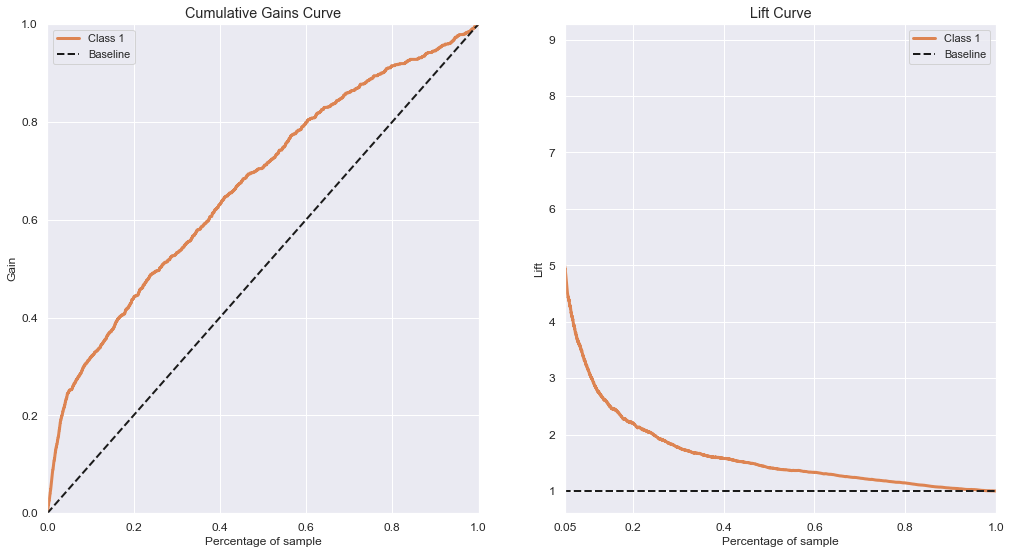

In [103]:
# Plot lift curves
predicted_probas = best_dt.predict_proba(X_test)

# figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 9))
plot_cumulative_gain(y_test, predicted_probas, ax=ax1)
plot_lift_curve(y_test, predicted_probas, ax=ax2)  # Lift is a measure of the effectiveness of a predictive model
                                                   # calculated as the ratio between the results obtained with and 
                                                   # without the predictive model.
# properties
ax2.set_xlim(0.05, 1)
ax2.set_xticks([0.05, 0.2, 0.4, 0.6, 0.8, 1.0])
ax2.set_xticklabels([0.05, 0.2, 0.4, 0.6, 0.8, 1.0])
for ax in (ax1, ax2):
    ax.axes.lines[0].remove()
    ax.get_legend().remove()
    ax.legend()

plt.show()

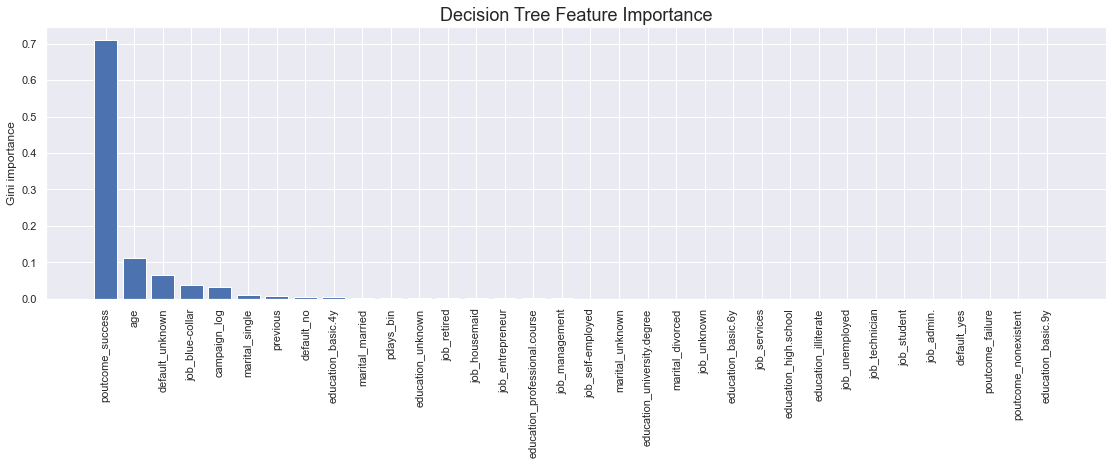

In [104]:
# Decision Tree Feature Importance plot
sns.set()

# data
feature_names = df_clean.drop('y', axis=1).columns
feature_importances = pd.Series(best_dt.feature_importances_, index=feature_names).\
    sort_values(ascending=False)

# figure
fig = plt.figure(figsize=(19,5))

# axis
plt.bar(x=feature_importances.index, height=feature_importances.values)

# properties
plt.ylabel("Gini importance")  # The importance of a feature is computed as the (normalized) total reduction of the 
                               # criterion brought by that feature. It is also known as the Gini importance.
plt.xticks(rotation=90)
plt.title("Decision Tree Feature Importance", fontsize=18)

plt.show()

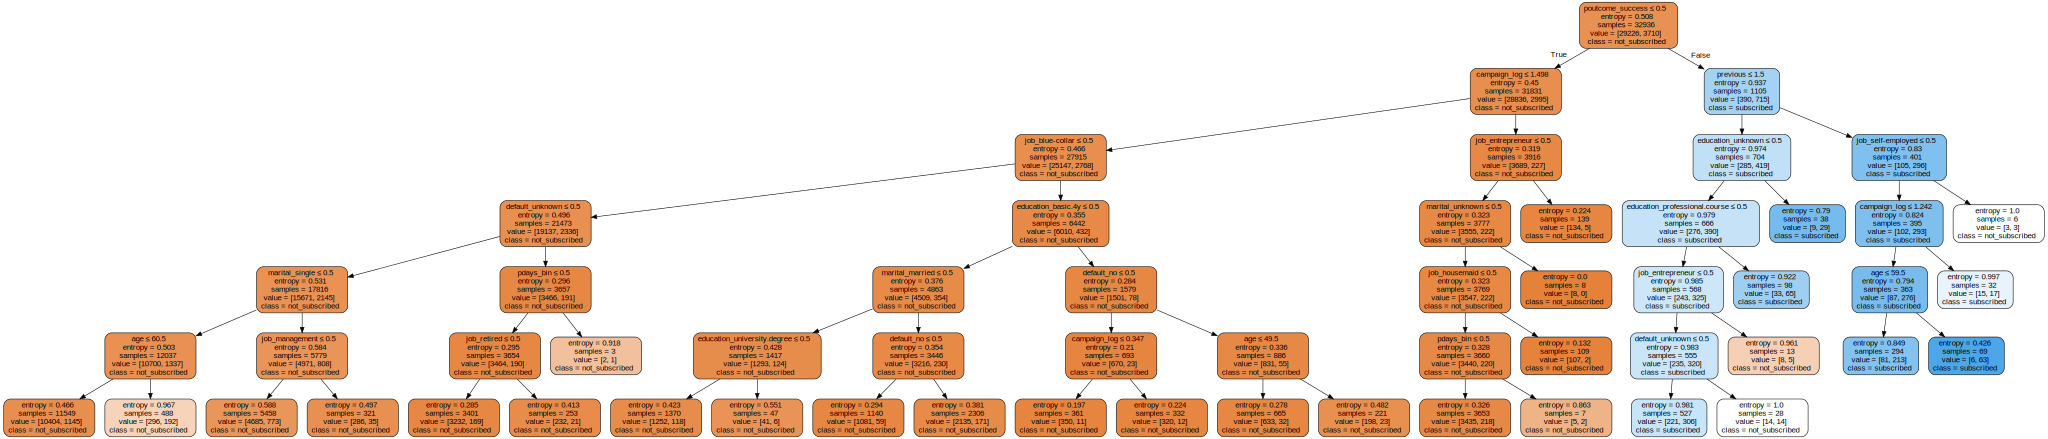

In [105]:
# Visualize decision tree
dot_data = export_graphviz(best_dt, out_file=None, 
                           feature_names=feature_names,  
                           class_names=['not_subscribed', 'subscribed'],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graphviz.Source(dot_data)   

Grid search cross-validation was used to iterate over several combinations of different hyper-parameter values. We obtain an estimate of each model precision using 5-fold cross-validation and then we select the model with the best performance.

The best model we obtained is a Decision Tree with the following hyperparameters `{'class_weight': None, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_split': 0.01, 'splitter': 'best'}` and with a test set precision of 0.690, which means that 69.0% of the observations predicted as *subscribed*, are actually *subscribed*. 

Comparing with the previous situation, where we were contacting every customer (which effectively translates into predicting everyone as *subscribed*), **the precision has increased by more than 6 fold from a mere 11.3%.**

We can also observe that the variable with the most importance for the model is, by far, *poutcome_success* which coincides with what we observed in the exploratory analysis.

The obtained rules and the entire decision tree can be visualized above.

## Evaluation and Deployment:

In this course, we won't explore the Evaluation and Deployment phases in detail. Hence, they are not mandatory in the cases' reports. Below you can find brief explanations. Please refer to the [CRISP-DM guide](https://www.the-modeling-agency.com/crisp-dm.pdf) or to [this reference](https://www.datascience-pm.com/crisp-dm-2/) for more information.

### Evaluation

> At this stage in the project, you have built a model (or models) that appears to have high quality from a data analysis perspective. Before proceeding to final deployment of the model, it is important to thoroughly evaluate it and review the steps executed to create it, to be certain the model properly achieves the business objectives. **A key objective is to determine if there is some important business issue that has not been sufficiently considered.** At the end of this phase, a decision on the use of the data mining results should be reached.

### Deployment:

> Creation of the model is generally not the end of the project. Even if the purpose of the model is to increase knowledge of the data, the knowledge gained will need to be organized and presented in a way that the customer can use it. **It often involves applying “live” models within an organization’s decision making processes—for example, real-time personalization of Web pages or repeated scoring of marketing databases.** Depending on the requirements, the deployment phase can be as simple as generating a report or as complex as implementing a repeatable data mining process across the enterprise. In many cases, it is the customer, not the data analyst, who carries out the deployment steps. However, even if the analyst will carry out the deployment effort, it is important for the customer to understand up front what actions need to be carried out in order to actually make use of the created models.

# How to use Git for collaboration?

Refer to [this file]("../../references/Git_Tutorial_-_Class_takeaways.pdf")

# How to organize and reuse code?